# Data Wrangling

### Alúmno: Spesot Adrián
### Curso: Data Science

## Consigna
#### Leer los set de datos w_data.csv y p_data.csv, fusionarlos a partir de la variable que tengan en común (ID)y realizar las siguientes ejercicios:

##### 1. Cuantos ID tienen en común. Nombrar cuales no tienen en común
##### 2. Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’
##### 3. Calcular la proporción que hay entre personas con salarios >50k respecto del total para entre personas de distinto sexo, Raza y Educacion. Por ejemplo cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación


### Librerías a Utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lectura de Archivos

In [2]:
p_data = pd.read_csv('p_data.csv',sep=';',skipinitialspace = True)
w_data = pd.read_csv('w_data.csv',sep=';',skipinitialspace = True)

p_data.head(5)

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [3]:
w_data.head(5)

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


#### Evaluamos si los archivos contienen celdas con NaN

In [4]:
# En este paso evaluamos si hay celdas con NaN y los sumamos para conocer cuantas celtas hay
a = p_data.isnull().sum().sum()
b = w_data.isnull().sum().sum()

print(f'''Cantidad de Celdas con NaN en archivo p_data: {a}
Cantidad de Celdas con NaN en archivo w_data: {b}''')

Cantidad de Celdas con NaN en archivo p_data: 8
Cantidad de Celdas con NaN en archivo w_data: 6


##### Conocemos cuales son los index con NaN para cada datasets

In [5]:
# Utilizamo any(1) para que nos devuelva la fila que contiene valores NaN
p_data[p_data.isnull().any(1)]

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
32561,NaN,NaN,37078,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
w_data[w_data.isnull().any(1)]

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
32561,NaN,NaN,NaN,NaN,NaN,37078,NaN


Si comparamos ambos, podemos observar que el ID 37078 se repite en ambos datasets por lo que podemos omitir este ID diréctamente eliminandolo en ambos datasets.

In [7]:
# Eliminamos missing values, axis=0 para que sea la fila completa, inplace=true para que guarde los cambios directamente en el archivo
p_data.dropna(axis=0, inplace=True)
w_data.dropna(axis=0, inplace=True)

### Fusión de Archivos

In [28]:
# Unimos los dataframe con merge con todas las convinaciones posibles

df_inner = pd.merge(p_data, w_data, on= 'ID', how='inner') # Unimos los DF con los datos en común
# df_left = pd.merge(p_data, w_data, on= 'ID', how='left') # Unimos los DF con los datos  respetando la tabla de la izquierda
# df_right = pd.merge(p_data, w_data, on= 'ID', how='right') # Unimos los DF con los datos respetando la tabla de la derecha
df_outer = pd.merge(p_data, w_data, on= 'ID', how='outer')# Unimos los DF con todos datos

### 1. Cuantos ID tienen en común. Nombrar cuales no tienen en común

##### Cuantos ID tienen en común

In [9]:
# Para conocer esta respuesta, debemos hacer un shape en el df_inner ya que este tipo de union nos muestra los datos en común
print(f'''Los archivos tienen {df_inner.shape[0]} ID en común entre los dataframe''')

Los archivos tienen 48841 ID en común entre los dataframe


##### Nombrar cuales no tienen datos en común

In [10]:
p = p_data['ID'].count()
w = w_data['ID'].count()

if p == w:
    print('todos los ID tienen datos en común')
else:
    print(f'''El archivo p_data contiene {p} ID  
El archivo w_data contiene {w} ID
Existe {abs(p-w)} archivos que no son común''')

El archivo p_data contiene 48841 ID  
El archivo w_data contiene 48842 ID
Existe 1 archivos que no son común


Como la cantidad de ID en común es de 48841 y la cantidad de datos de p_data es la misma, se asumen que el conjnto de datos
w_data contiene al conjunto de datos p_data.-
Con esto podemos decir que solo se registra 1 ID que no comparten ambas tablas

Ver web:
http://exponentis.es/como-encontrar-valores-nan-en-un-dataframe-python-pandas-y-modificarlos

In [11]:
df_outer.isnull().values.any() # Detectamos si tenemos valores NaN

True

In [12]:
df_outer.isnull().sum().sum() # Calculamos que cantidad de cendas contienen NaN

8

In [13]:
df_outer[df_outer.isnull().any(1)] # Nos muestra el dataframe donde tenemos lo valoares nan

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
48841,NaN,NaN,1344995623,NaN,NaN,NaN,NaN,NaN,NaN,Self-emp-inc,182148.0,0.0,0.0,60.0,>50K.


In [14]:
# ¿Qué ID no tienen en común?
df_outer[df_outer.isnull().any(1)]['ID']

48841    1344995623
Name: ID, dtype: int64

### 2. Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’

In [15]:
# Chequeamos cuantos valores de Target tenemos
df_outer.groupby('Target')['Target'].count()

Target
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: Target, dtype: int64

In [16]:
# Reemplazamos valores para que queden 2 valores distintos
df_outer.replace(['<=50K.', '<=50K'],'<=50K',inplace= True)
df_outer.replace(['>50K.', '>50K'],'>50K',inplace= True)


In [17]:
# Chequeamos que queden solo dos valores distintos de target = '<=50' y '>50' 
df_outer.groupby('Target')['Target'].count()

Target
<=50K    37155
>50K     11687
Name: Target, dtype: int64

### 3. Calcular la proporción que hay entre personas con salarios >50k respecto del total para entre personas de distinto sexo, Raza y Educacion. Por ejemplo cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación

##### Crearemos un DF dejando unicamente los campos SEX, RACE, EDUCATION y agregamos dos campos de Cant Total y Cant de target >50K y Cant target <=50K

In [18]:
# Creo un df calculando la cantidad total filtrada por Sex, Race y Education
df_calculo = df_outer.groupby(['Sex','Race','Education']).aggregate({'ID': 'count'}).\
                                                            reset_index().\
                                                            rename(columns={'ID':'Total_quantity'})

# Creo un df calculando la cantidad con Target >50K filtrada por Sex, Race y Education
df_calculo_50K = df_outer[df_outer['Target']=='>50K'].groupby(['Sex','Race','Education']).aggregate({'ID': 'count'}).\
                                                                                            reset_index().\
                                                                                            rename(columns={'ID':'Quantity_>50K'})

# Creo un df calculando la cantidad con Target >50K filtrada por Sex, Race y Education
df_calculo_menor_50K = df_outer[df_outer['Target']=='<=50K'].groupby(['Sex','Race','Education']).aggregate({'ID': 'count'}).\
                                                                                            reset_index().\
                                                                                            rename(columns={'ID':'Quantity_<=50K'})                                                                                            

# Uno ambas tablas conectadas con Sex, Race y Education
df = pd.merge(df_calculo,df_calculo_50K,how='left', on=['Sex','Race','Education'])
df = pd.merge(df,df_calculo_menor_50K,how='left', on=['Sex','Race','Education'])

# Reemplazo los NaN generados por un valor = 0
df.fillna(int(0), inplace=True)

# Convierto el tipo de datos de Quantity_>50 en entero
df = df.astype({'Quantity_>50K': 'int64','Quantity_<=50K': 'int64'})

# Mostramos el DataFrame Limpio para los calculos
df.head(5)

,Sex,Race,Education,Total_quantity,Quantity_>50K,Quantity_<=50K
0,Female,Amer-Indian-Eskimo,10th,10,0,10
1,Female,Amer-Indian-Eskimo,11th,7,0,7
2,Female,Amer-Indian-Eskimo,1st-4th,2,0,2
3,Female,Amer-Indian-Eskimo,7th-8th,3,0,3
4,Female,Amer-Indian-Eskimo,9th,3,0,3


##### Generar DataFrame para Sexo

In [19]:
# Creo un DF qe comprende datos de Sex

df_sex = df.groupby(['Sex'])['Sex','Total_quantity','Quantity_>50K','Quantity_<=50K'].sum().reset_index()
                                                                                                    
df_sex

C:\Users\Adrian\AppData\Local\Temp\ipykernel_24696\1328372530.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sex = df.groupby(['Sex'])['Sex','Total_quantity','Quantity_>50K','Quantity_<=50K'].sum().reset_index()


,Sex,Total_quantity,Quantity_>50K,Quantity_<=50K
0,Female,16192,1769,14423
1,Male,32649,9917,22732


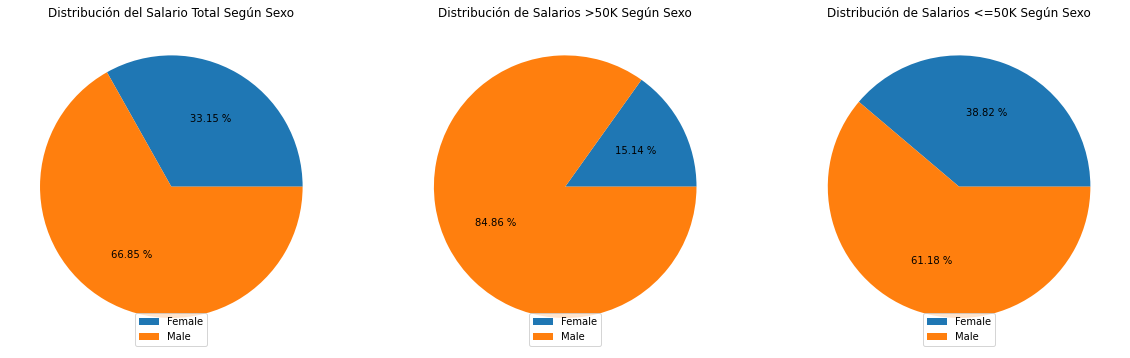

In [29]:
# Grafico resultados comparativos
_, (a,b,c) =plt.subplots(1,3,figsize=(20,10))
a.set_title('Distribución del Salario Total Según Sexo')
a.pie(df_sex['Total_quantity'],autopct='%0.2f %%')
a.legend(labels=df_sex['Sex'], loc = 'lower center')

b.set_title('Distribución de Salarios >50K Según Sexo')
b.pie(df_sex['Quantity_>50K'],autopct='%0.2f %%')
b.legend(labels=df_sex['Sex'], loc = 'lower center')

c.set_title('Distribución de Salarios <=50K Según Sexo')
c.pie(df_sex['Quantity_<=50K'],autopct='%0.2f %%')
c.legend(labels=df_sex['Sex'], loc = 'lower center')


##### Generar DataFrame para Raza

In [21]:
# Creo un DF qe comprende datos de Sex

df_race = df.groupby(['Race'])['Race','Total_quantity','Quantity_>50K','Quantity_<=50K'].sum().reset_index()
                                                                                                    
df_race

C:\Users\Adrian\AppData\Local\Temp\ipykernel_24696\3429195675.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_race = df.groupby(['Race'])['Race','Total_quantity','Quantity_>50K','Quantity_<=50K'].sum().reset_index()


,Race,Total_quantity,Quantity_>50K,Quantity_<=50K
0,Amer-Indian-Eskimo,470,55,415
1,Asian-Pac-Islander,1519,409,1110
2,Black,4685,566,4119
3,Other,406,50,356
4,White,41761,10606,31155


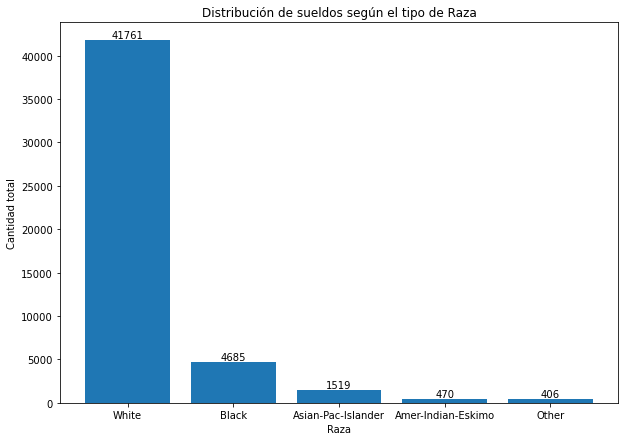

In [22]:
# Grafico resultados comparativos
plt.subplots(figsize=(10, 7))
plt.title('Distribución de sueldos según el tipo de Raza')

#Ordeno los datos de mayor a menor
df_race_sort_total = df_race.sort_values('Total_quantity',ascending=False)

a = plt.bar(df_race_sort_total['Race'],df_race_sort_total['Total_quantity'])
plt.xlabel('Raza')
plt.ylabel('Cantidad total')

plt.bar_label(a); # Agrego la etiqueta de datos
plt.show()



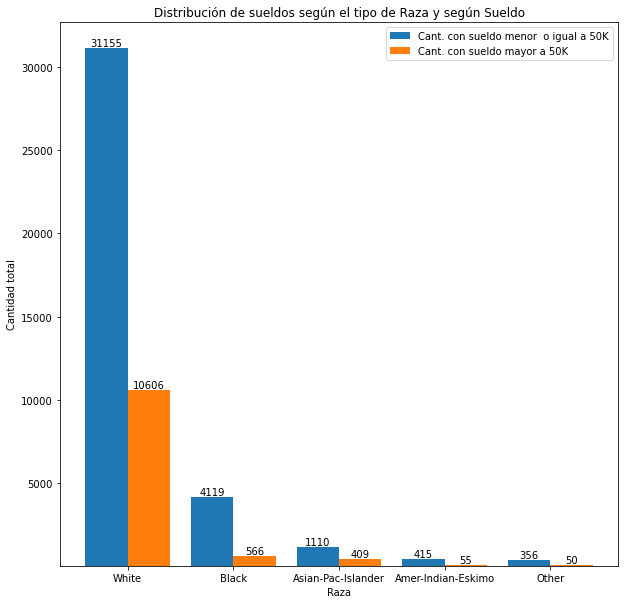

In [23]:
# Grafico resultados comparativos entre 
plt.subplots(figsize=(10, 10))
plt.title('Distribución de sueldos según el tipo de Raza y según Sueldo')

x1 = np.arange(5) #creo un arreglo de las posiciones
a = plt.bar(x1-0.2,df_race_sort_total['Quantity_<=50K'],width=0.4,label= 'Cant. con sueldo menor  o igual a 50K')
b = plt.bar(x1+0.2,df_race_sort_total['Quantity_>50K'],width=0.4,label= 'Cant. con sueldo mayor a 50K')
plt.ylim(bottom=2)

# asigno al arreglo x1 una label cuyo arreglo será [White, Black,Asian-Pac-Islander, American-Indian-Eskimo, Other]
plt.xticks(x1,df_race_sort_total['Race']) 

# Agrego etiquetas
plt.xlabel('Raza')
plt.ylabel('Cantidad total')

plt.legend()

plt.bar_label(a); # Agrego la etiqueta de datos
plt.bar_label(b);
plt.show()

##### Generar DataFrame para Educación

In [24]:
# Creo un DF qe comprende datos de Sex

df_education = df.groupby(['Education'])['Education','Total_quantity','Quantity_>50K','Quantity_<=50K'].sum().reset_index()
                                                                                                    
df_education.head(5)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_24696\2459061576.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_education = df.groupby(['Education'])['Education','Total_quantity','Quantity_>50K','Quantity_<=50K'].sum().reset_index()


,Education,Total_quantity,Quantity_>50K,Quantity_<=50K
0,10th,1389,87,1302
1,11th,1812,92,1720
2,12th,657,48,609
3,1st-4th,247,8,239
4,5th-6th,509,27,482


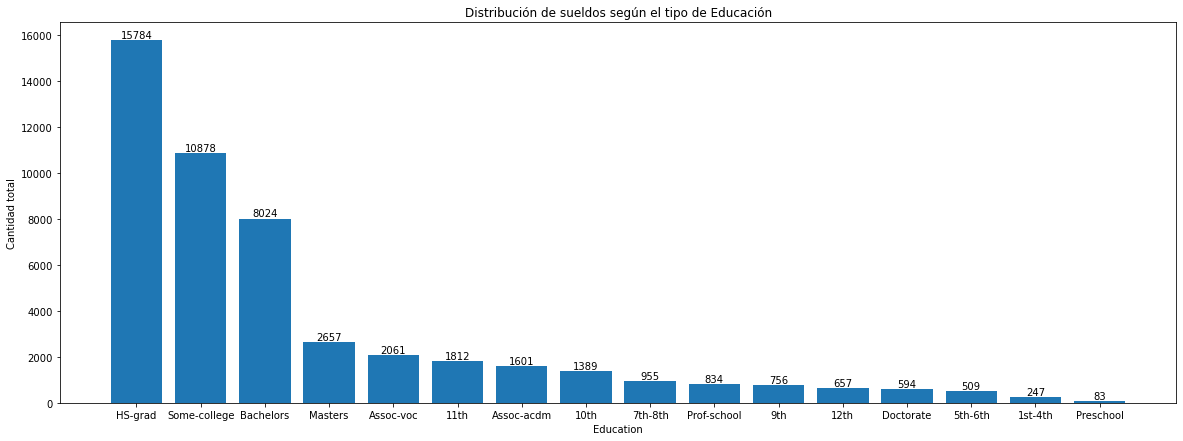

In [25]:
# Grafico resultados comparativos
plt.subplots(figsize=(20, 7))
plt.title('Distribución de sueldos según el tipo de Educación')

#Ordeno los datos de mayor a menor
df_education_sort_total = df_education.sort_values('Total_quantity',ascending=False)

a = plt.bar(df_education_sort_total['Education'],df_education_sort_total['Total_quantity'])
plt.xlabel('Education')
plt.ylabel('Cantidad total')

plt.bar_label(a); # Agrego la etiqueta de datos
plt.show()


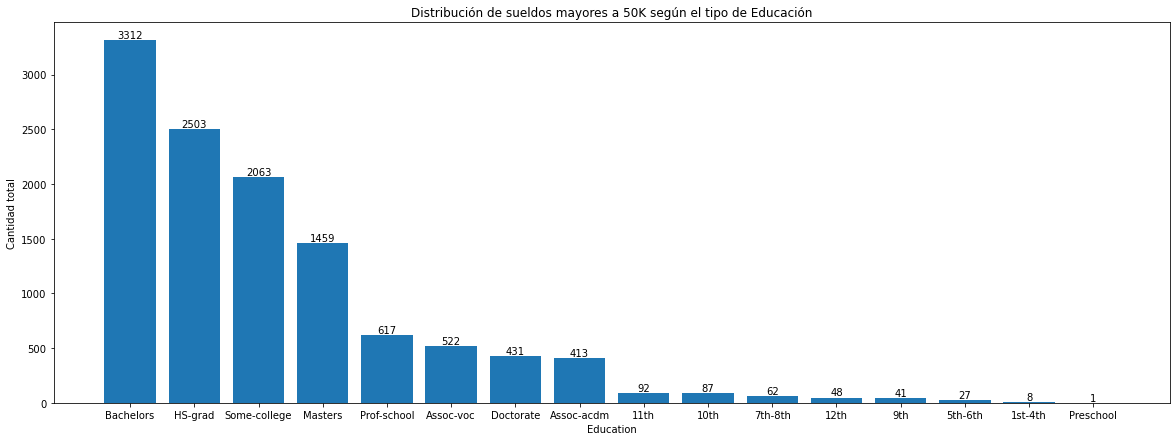

In [26]:
# Grafico resultados comparativos
plt.subplots(figsize=(20, 7))
plt.title('Distribución de sueldos mayores a 50K según el tipo de Educación')

#Ordeno los datos de mayor a menor
df_education_sort_total = df_education.sort_values('Quantity_>50K',ascending=False)

a = plt.bar(df_education_sort_total['Education'],df_education_sort_total['Quantity_>50K'])
plt.xlabel('Education')
plt.ylabel('Cantidad total')

plt.bar_label(a); # Agrego la etiqueta de datos
plt.show()